In [18]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [68]:
X = np.random.rand(10,2)

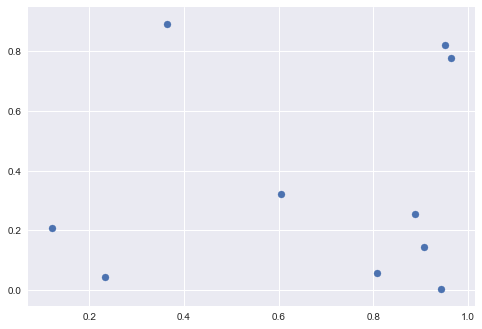

In [58]:
plt.scatter( X[:,0] , X[:,1] )
plt.show()

Compute squared differences in one line

In [70]:
dist_sq = np.sum( ( X[ :, np.newaxis, : ] - X[ np.newaxis, :, :] )**2 , axis = -1 )

In [60]:
#aux = X[ :, np.newaxis, : ] - X[ np.newaxis, :, :]
#aux.shape

pair-distance matrix should have 0's in the diagonal

In [61]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Finding the nearest neighbourhs by sorting the entire matrix

In [62]:
nearest = np.argsort( dist_sq , axis =1 )

In [63]:
print(nearest) # note that first column give us 0-9 ordered
# each element is the closest to itself (0's in diagonal)

[[0 8 4 2 5 1 6 9 7 3]
 [1 6 2 9 4 7 3 8 0 5]
 [2 6 9 1 4 8 0 7 3 5]
 [3 7 1 5 4 6 2 9 0 8]
 [4 1 2 6 9 8 0 7 3 5]
 [5 3 7 4 0 1 8 6 2 9]
 [6 1 2 9 4 7 3 8 0 5]
 [7 3 1 4 5 6 2 9 0 8]
 [8 0 4 2 6 1 9 5 7 3]
 [9 2 6 1 4 8 7 3 0 5]]


There is no need however to further sort above the number K of nearest neighbours needed

In [71]:
K = 3
nearest_partition = np.argpartition( dist_sq, K +1 , axis =1 )

In [72]:
print(nearest_partition)

[[3 6 0 5 2 4 1 7 8 9]
 [1 4 2 5 9 3 6 7 8 0]
 [2 5 1 3 0 4 6 7 8 9]
 [3 6 0 5 2 4 1 7 8 9]
 [1 4 9 2 5 7 0 8 3 6]
 [5 2 3 0 1 6 4 7 8 9]
 [3 6 0 5 2 8 4 7 1 9]
 [7 4 8 9 6 2 0 3 5 1]
 [6 4 8 7 0 5 1 3 2 9]
 [9 4 1 7 8 2 5 6 3 0]]


Visualization

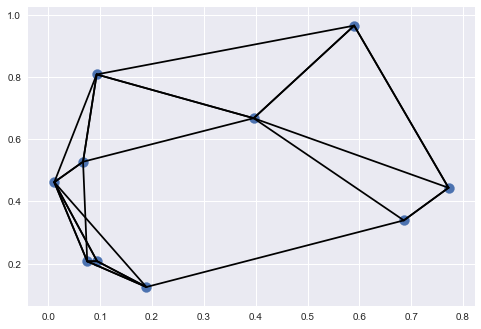

In [73]:
plt.scatter( X[:,0] , X[:,1], s = 100 )

# Draw lines to neighbours
for i in range( X.shape[0] ):
    for j in nearest_partition[ i, :K+1 ]:
        # plot a line from X[i] to X[j]
        plt.plot( *zip(X[j] , X[i]) , color = 'black')